In [51]:
# 4) Use one or more computational notebooks to analyze data to some valuable end, including exploratory and explanatory visualizations, models built from the data through machine learning
#algorithms, and evaluations of model performance (where applicable).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
# Import Train Data
train = pd.read_csv('data/train.csv')
pd.set_option('display.max_columns',None)
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Import Test Data
test = pd.read_csv('data/test.csv')
pd.set_option('display.max_columns',None)
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
#train dataset has one more column than the test dataset (SalePrice, which we want to predict)
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [5]:
#dropping Id column to use later
train_id = train['Id']
test_id = test['Id']
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

<AxesSubplot:>

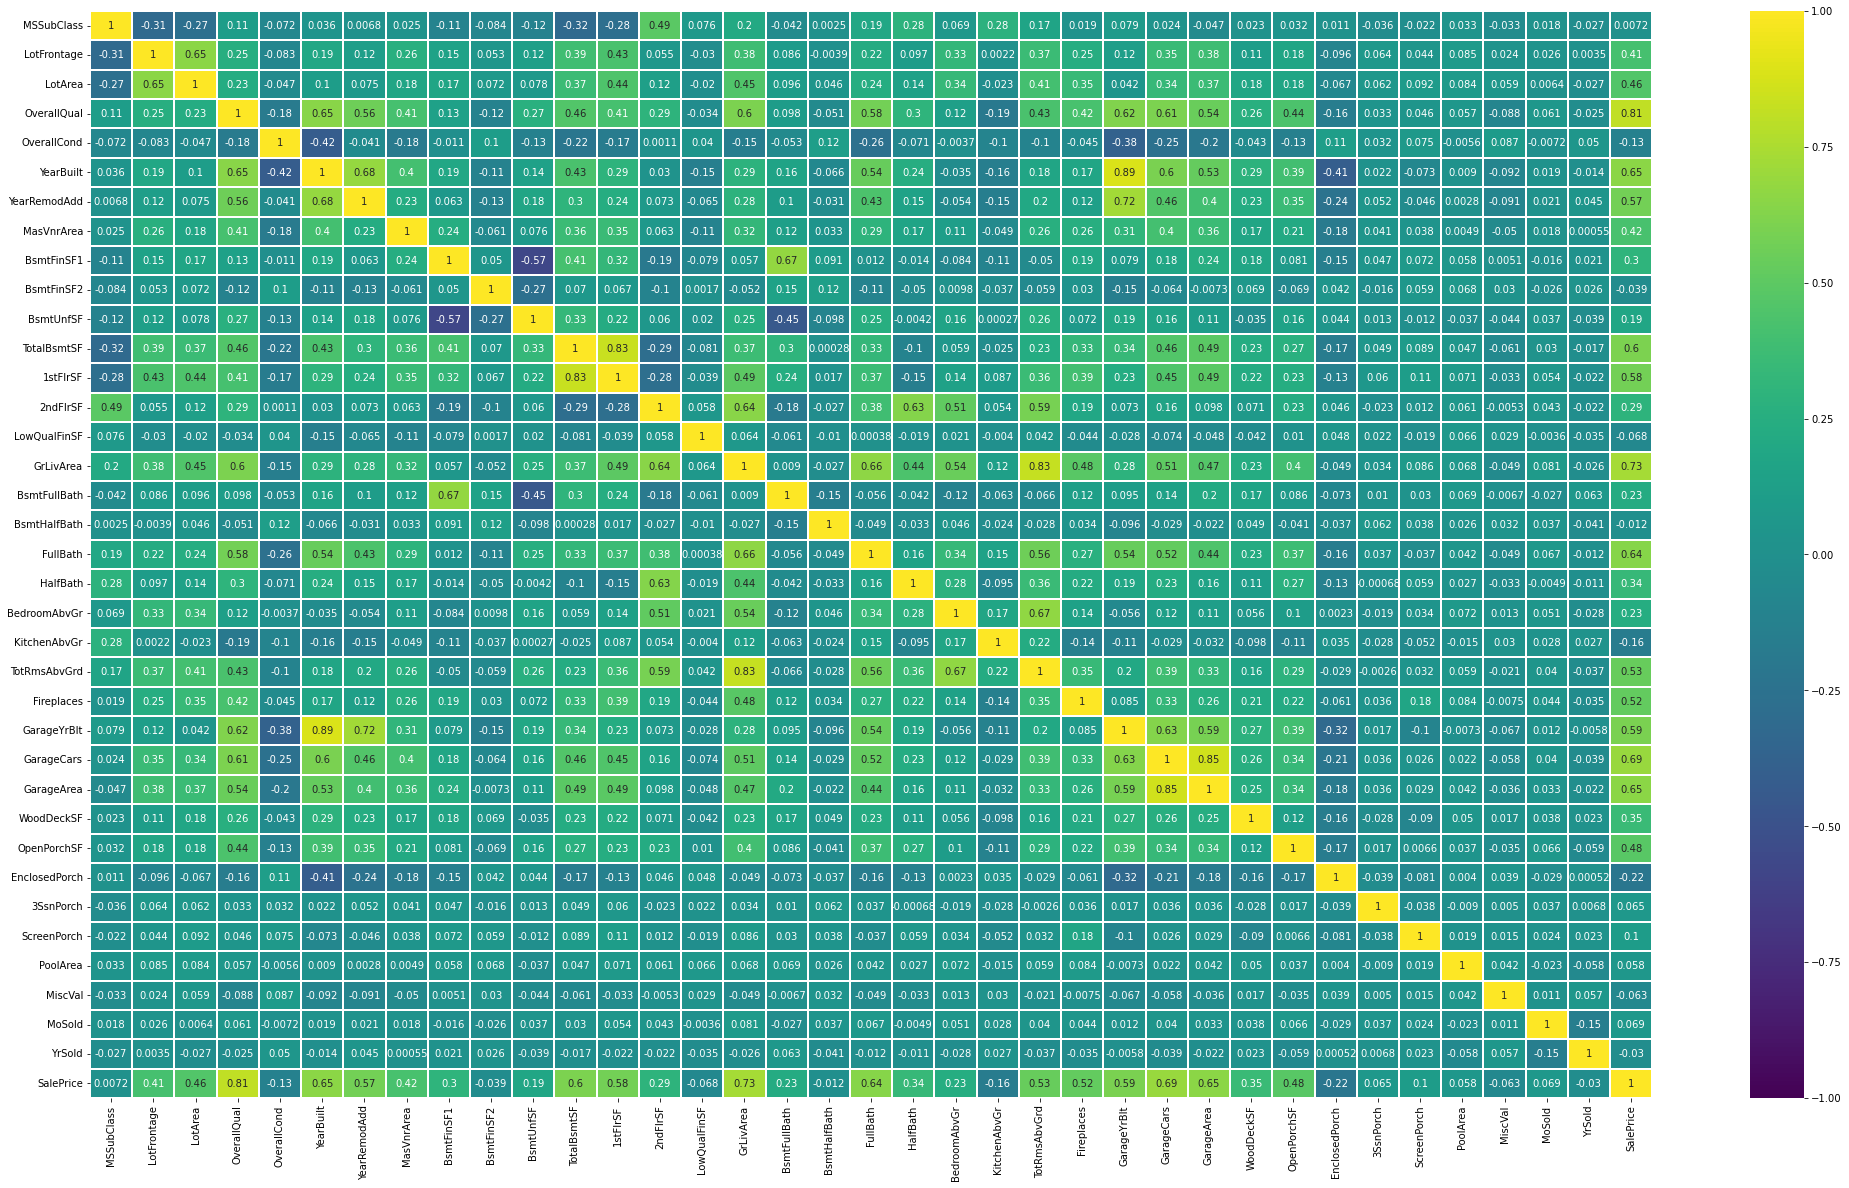

In [6]:
# Checking correlation between columns 
corr_train = train.corr(method="spearman")
plt.figure(figsize=(35,20))
sns.heatmap(corr_train, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [7]:
 # Create the list of  main features(columns which have high correlation with the target variable)
main_features=train[['OverallQual','GrLivArea','GarageCars','Fireplaces','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice']]

main_features.head()
#main_features.info()
main_features.isnull().sum()
#The selected main features have no missing values

OverallQual     0
GrLivArea       0
GarageCars      0
Fireplaces      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

In [8]:
#create a DataFrame called X with the predictive features
X=main_features.drop("SalePrice",axis=1)
#X.isnull().sum().sum()
X.head()

,OverallQual,GrLivArea,GarageCars,Fireplaces,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,0,548,856,856,2,8,2003,2003
1,6,1262,2,1,460,1262,1262,2,6,1976,1976
2,7,1786,2,1,608,920,920,2,6,2001,2002
3,7,1717,3,1,642,756,961,1,7,1915,1970
4,8,2198,3,1,836,1145,1145,2,9,2000,2000


In [9]:
y=main_features["SalePrice" ]
#y.isnull().sum().sum()
y.describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
# Split into testing and training data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.5,random_state=8000)
X_train.info()
y_test.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 227 to 236
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   730 non-null    int64
 1   GrLivArea     730 non-null    int64
 2   GarageCars    730 non-null    int64
 3   Fireplaces    730 non-null    int64
 4   GarageArea    730 non-null    int64
 5   TotalBsmtSF   730 non-null    int64
 6   1stFlrSF      730 non-null    int64
 7   FullBath      730 non-null    int64
 8   TotRmsAbvGrd  730 non-null    int64
 9   YearBuilt     730 non-null    int64
 10  YearRemodAdd  730 non-null    int64
dtypes: int64(11)
memory usage: 68.4 KB


count       730.000000
mean     181928.131507
std       80928.802155
min       35311.000000
25%      130000.000000
50%      164800.000000
75%      214750.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
features = ['OverallQual','GrLivArea','GarageCars','Fireplaces','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
test_X = test[features]
test_X.isnull().sum()


OverallQual     0
GrLivArea       0
GarageCars      1
Fireplaces      0
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [12]:
# All columns with NA values in the test data are numeric, so we replace the NA values with the imputed mean
mean_imputer = SimpleImputer()
mean_columns = ['GarageCars','GarageArea','TotalBsmtSF']
mean = mean_imputer.fit_transform(test_X[mean_columns])
test_X[mean_columns] = pd.DataFrame(mean).values

/var/folders/7g/d70dk3ts2_9bj5ftfvcc157r0000gn/T/ipykernel_17716/3683714469.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X[mean_columns] = pd.DataFrame(mean).values


In [13]:
#check if test_X still has any NA values
test_X.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
Fireplaces      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [14]:
#Linear Regression
model=LinearRegression()
model.fit(X_train,y_train)
prediction_1=model.predict(X_test)
prediction_1

array([128124.12287762, 120550.80951959, 202831.79430674, 101738.08917548,
       323620.07897728, 120940.17052909, 263538.55897143, 230140.29929722,
       211860.24853136, 160121.80709215,  99391.61157582, 148165.9779977 ,
       137181.32536613, 107938.6125508 , 243039.21191275, 110880.9359846 ,
       217027.8778995 , 100606.47033243, 172023.72176048, 106811.46136072,
       261365.32048657, 128492.85119824, 222226.07758113,  74228.53174379,
       109781.09006802, 255282.45389504, 246118.97565714, 105425.1461695 ,
       254373.5299541 , 265664.35747587, 125842.5879015 , 205433.1485446 ,
       108629.85422032, 106407.11022064, 132770.32693452, 207556.48380135,
       219886.31883551,  81283.74409794, 213121.49124076, 165776.12726111,
       286548.3911367 ,  70792.4993707 , 181912.29068029, 135519.66531095,
       143005.08532728, 207188.90669944, 156478.65026287,  84498.76194541,
        42666.6634114 , 212133.42111691, 191182.35166824, 198829.07876193,
       294235.1673423 , 1

In [15]:
model.score(X_test,y_test)

0.7671893322560731

In [16]:
#Calculate Mean Absolute Error and Root Mean Squared Error
MAE = mean_absolute_error(y_test, prediction_1)
MSE = mean_squared_error(y_test, prediction_1)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:" , RMSE)

Root Mean Squared Error: 39021.7628023221


In [17]:
print("Mean Absolute Error:" , MAE)


Mean Absolute Error: 24570.76049269133


In [18]:
#RandomForest
model_2=RandomForestRegressor()
model_2.fit(X_train,y_train)
prediction_2=model_2.predict(X_test)
print(prediction_2)

[138857.         136844.5        196407.24       113654.29
 320101.83       130925.5        245955.95       193143.2
 196155.24       146554.         113887.         141448.34
 133632.52       133168.         218575.83       128367.
 215166.14        97959.2        173522.52       112332.
 277290.21       139755.34       210843.         123990.76
 128217.         241822.82       234408.16       127861.75
 232424.4        258937.4        125701.66       203810.3
 122913.25       130271.38       118471.68       181313.9
 194576.72       116716.         178102.34       148945.68
 264932.99       106315.52       183210.95       146097.5
 139791.43       201253.3        160871.82        86403.
  80817.5        177734.09       164756.95       172379.85
 327544.07       227203.02       205803.1        131310.5
 142962.58       310996.79       171035.         117463.62
 169605.45       195383.45       174824.4        193364.44
 236397.57       134800.59       117966.42       200935.53
 179709.

In [19]:
model_2.score(X_test,y_test)

0.8314135959703309

In [20]:
#Calculate Mean Absolute Error and Root Mean Squared Error
MAE = mean_absolute_error(y_test, prediction_2)
MSE = mean_squared_error(y_test, prediction_2)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:" , RMSE)

Root Mean Squared Error: 33206.01196469961


In [21]:
print("Mean Absolute Error:" , MAE)

Mean Absolute Error: 19152.087203196348


In [22]:
#Decision Tree Regressor
model_3=DecisionTreeRegressor()
model_3.fit(X_train,y_train)
prediction_3=model_3.predict(X_test)
print(prediction_3)

[135000.         132500.         183000.         115000.
 270000.         149900.         251000.         192500.
 189000.         140000.          87000.         145000.
 145000.         133700.         215000.         151500.
 192500.          82000.         181000.         154900.
 225000.         145000.         129000.         119000.
 144900.         230000.         171000.         105500.
 212000.         294000.         117000.         223500.
 118500.         132500.         154900.         178000.
 207000.         120500.         180000.         154000.
 232000.         145000.         181000.         142500.
 130000.         225000.         115000.         106250.
  86000.         178900.         133750.         172785.
 245350.         280000.         182000.         128500.
 131500.         309000.         171000.         113000.
 178000.         191000.         176000.         195400.
 240000.         137000.         107400.         207000.
 178000.         134432.       

In [23]:
model_3.score(X_test,y_test)

0.7236863356892053

In [24]:
#Calculate Mean Absolute Error and Root Mean Squared Error
MAE = mean_absolute_error(y_test, prediction_3)
MSE = mean_squared_error(y_test, prediction_3)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:" , RMSE)

Root Mean Squared Error: 42511.51942522101


In [25]:
print("Mean Absolute Error:" , MAE)

Mean Absolute Error: 27668.253424657534


In [26]:
#Generate Test Predictions
# Model 2 has the highest accuracy, so we use Model 2 as the final model for prediction of SalePrice
preds_test = model_2.predict(test_X)

In [27]:
# Save test predictions to a csv file
submission = pd.DataFrame({'ID':test_id,'SalePrice': preds_test})
submission.to_csv('submission.csv', index=False)

In [28]:
print(submission)

        ID      SalePrice
0     1461  121651.200000
1     1462  144196.000000
2     1463  167411.540000
3     1464  182558.000000
4     1465  223095.850000
...    ...            ...
1454  2915   78127.166667
1455  2916   81959.000000
1456  2917  146783.030000
1457  2918  110836.000000
1458  2919  243784.360000

[1459 rows x 2 columns]
